In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre
...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza
1996,1997,1,0,63079,7574,0,Hally,Danderyd
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying


In [4]:
df.dtypes

Person_ID            int64
Own_House            int64
Own_vehicle          int64
Monthly_Salary       int64
Standard_Savings     int64
Bank_Debts           int64
Name                object
Area                object
dtype: object

In [5]:
df.isna().sum()

Person_ID           0
Own_House           0
Own_vehicle         0
Monthly_Salary      0
Standard_Savings    0
Bank_Debts          0
Name                0
Area                0
dtype: int64

In [6]:
df.columns

Index(['Person_ID', 'Own_House', 'Own_vehicle', 'Monthly_Salary',
       'Standard_Savings', 'Bank_Debts', 'Name', 'Area'],
      dtype='object')

In [7]:
from sklearn.cluster import KMeans

In [8]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Person_ID', 'Own_House', 'Own_vehicle', 'Monthly_Salary',
       'Standard_Savings', 'Bank_Debts']])
    sse.append(km.inertia_)

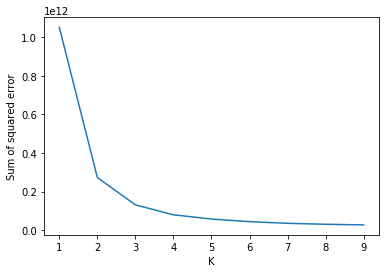

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

In [10]:
KM = KMeans(n_clusters = 4)
predict = KM.fit_predict(df[['Person_ID','Own_House', 'Own_vehicle', 'Monthly_Salary','Standard_Savings', 'Bank_Debts']])
pd.DataFrame(predict)
df["Groups"] = predict
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area,Groups
0,1,0,1,66278,3989,1,Con,Shenavan,1
1,2,0,0,64701,7076,1,Alphonso,Shubenka,1
2,3,1,1,28045,5659,1,Bordy,Chowṉêy,0
3,4,0,0,21690,6314,0,Margot,Pakxong,0
4,5,0,0,67479,9894,0,Denice,Ardazubre,1
...,...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza,2
1996,1997,1,0,63079,7574,0,Hally,Danderyd,1
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda,1
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying,1


In [11]:
predict = df.loc[:,["Person_ID","Groups"]]
predict.to_csv("D:\\Skillenza_Bootcamp\\ML Level1\\Problem2\\Customer_Segment10.csv",index = False)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# scaler.fit(df[['Person_ID']])
scaler.fit(df[['Monthly_Salary']])
scaler.fit(df[['Standard_Savings']])

MinMaxScaler()

In [13]:
# df['Person_ID_Scaled'] = scaler.fit_transform(df[['Person_ID']])
df['Monthly_Salary_Scaled'] = scaler.fit_transform(df[['Monthly_Salary']])
df['Standard_Savings_Scaled'] = scaler.fit_transform(df[['Standard_Savings']])

In [14]:
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area,Monthly_Salary_Scaled,Standard_Savings_Scaled
0,1,0,1,66278,3989,1,Con,Shenavan,0.578453,0.332295
1,2,0,0,64701,7076,1,Alphonso,Shubenka,0.558738,0.675601
2,3,1,1,28045,5659,1,Bordy,Chowṉêy,0.100486,0.518016
3,4,0,0,21690,6314,0,Margot,Pakxong,0.021040,0.590859
4,5,0,0,67479,9894,0,Denice,Ardazubre,0.593467,0.988990
...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza,0.428611,0.051935
1996,1997,1,0,63079,7574,0,Hally,Danderyd,0.538461,0.730983
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda,0.624470,0.087522
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying,0.629146,0.722086


In [29]:
from sklearn.cluster import KMeans
sse1 = []
for k in range(1,10):
    km1 = KMeans(n_clusters=k)
    km1.fit(df[['Own_House', 'Own_vehicle','Monthly_Salary_Scaled','Standard_Savings_Scaled','Bank_Debts']])
    sse1.append(km1.inertia_)

In [30]:
# df[['Person_ID_Scaled', 'Own_House', 'Own_vehicle', 'Monthly_Salary_Scaled',
#        'Standard_Savings_Scaled', 'Bank_Debts']]

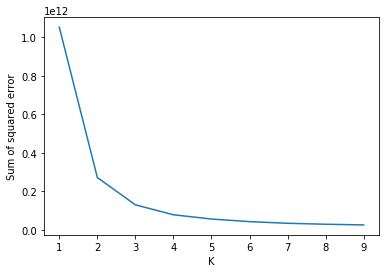

In [31]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

In [32]:
KM = KMeans(n_clusters = 4)

In [33]:
predict = KM.fit_predict(df[['Monthly_Salary_Scaled','Standard_Savings_Scaled','Bank_Debts']])

In [34]:
predict

array([0, 2, 0, ..., 0, 3, 3])

In [35]:
df["Groups"] = predict

In [36]:
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area,Monthly_Salary_Scaled,Standard_Savings_Scaled,Groups
0,1,0,1,66278,3989,1,Con,Shenavan,0.578453,0.332295,0
1,2,0,0,64701,7076,1,Alphonso,Shubenka,0.558738,0.675601,2
2,3,1,1,28045,5659,1,Bordy,Chowṉêy,0.100486,0.518016,0
3,4,0,0,21690,6314,0,Margot,Pakxong,0.021040,0.590859,3
4,5,0,0,67479,9894,0,Denice,Ardazubre,0.593467,0.988990,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza,0.428611,0.051935,0
1996,1997,1,0,63079,7574,0,Hally,Danderyd,0.538461,0.730983,3
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda,0.624470,0.087522,0
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying,0.629146,0.722086,3


In [37]:
df_new = df.loc[:,["Person_ID","Groups"]]
df_new.to_csv("D:\\Skillenza_Bootcamp\\ML Level1\\Problem2\\Customer_Segment8.csv")

In [38]:
df_new.to_csv("D:\\Skillenza_Bootcamp\\ML Level1\\Problem2\\Customer_Segment8.csv")